<a href="https://colab.research.google.com/github/frececco/EC3_SummerSchool/blob/main/EC3_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a model and training it on EPC data

Copyright 2023 Fulvio Re Cecconi

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License .
You may obtain a copy of the License at

    https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied .
See the License for the specific language governing permissions and
limitations under the License .

**Connecting to google drive and importing neede librarie**

In [1]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
# import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [54]:
# reading raw data
df = pd.read_csv('/content/drive/MyDrive/2023_EC3_SummerSchoolData/SeparateDS/c1_schools.csv')
s = len(df)
print('Imported', s, 'records')

Imported 2765 records


**Data cleaning**

In [55]:
# create a unique ID to remove duplicates
df['UNIQUE_ID']=df['COMUNE']+df['FOGLIO']+df['PARTICELLA']+df['SUBALTERNO']
print('There are', len(df[df.duplicated(subset=['UNIQUE_ID'])]), 'duplicates')
# remove duplicates
df=df.drop_duplicates(subset=['UNIQUE_ID'], keep='last')
# drop the UNIQUE_ID column
df=df.drop(['UNIQUE_ID'], axis=1)
print('There are', len(df),'records left')

There are 189 duplicates
There are 2576 records left


In [56]:
# adding the two column needed for data cleaning to the dataset
df['H_MEDIA'] = df.VOLUME_LORDO / df.SUPERFICIE_LORDA
df['RAPPORTO_SV'] = df.SUPERFICIE_DISPERDENTE / df.VOLUME_LORDO

In [57]:
# error 1
vol_start = len(df)
print('Starting with',vol_start, 'records')
df.drop(df[(df.VOLUME_LORDO < 27 )].index, inplace=True)
print('Deleted',vol_start - len(df), 'too small records')
df.drop(df[(df.VOLUME_LORDO > 25000 )].index, inplace=True)
vol_end = len(df)
print('Ending with',vol_end, 'records')
print('Deleted', vol_start-vol_end, 'records out of', vol_start, 'equal to',round((vol_end-vol_start)/vol_start*10000,2)/100,'%')

Starting with 2576 records
Deleted 0 too small records
Ending with 2425 records
Deleted 151 records out of 2576 equal to -5.8618 %


In [58]:
# error 2
vol_start = len(df)
print('Starting with',vol_start, 'records')
df.drop(df[(df.SUPERFICIE_LORDA < 10 )].index, inplace=True)
print('Deleted',vol_start - len(df), 'too small records')
df.drop(df[(df.SUPERFICIE_LORDA > 10000)].index, inplace=True)
vol_end = len(df)
print('Ending with',vol_end, 'records')
print('Deleted', vol_start-vol_end, 'records out of', vol_start, 'equal to',
      round((vol_end-vol_start)/vol_start*10000,2)/100,'%')

Starting with 2425 records
Deleted 0 too small records
Ending with 2425 records
Deleted 0 records out of 2425 equal to 0.0 %


In [59]:
# error 3
vol_start = len(df)
print('Starting with',vol_start, 'records')
df.drop(df[(df.H_MEDIA < 2.5 )].index, inplace=True)
df.drop(df[(df.H_MEDIA > 10 )].index, inplace=True)
vol_end = len(df)
print('Ending with',vol_end, 'records')
print('Deleted', vol_start-vol_end, 'records out of', vol_start, 'equal to',round((vol_end-vol_start)/vol_start*10000,2)/100,'%')

Starting with 2425 records
Ending with 2409 records
Deleted 16 records out of 2425 equal to -0.6598 %


In [60]:
# error 4
sv_mean = np.mean(df.RAPPORTO_SV)
sv_stddev = np.std(df.RAPPORTO_SV)
print('Upper limit', (sv_mean + 3 * sv_stddev))
vol_start = len(df)
print('Starting with',vol_start, 'records')
df.drop(df[(df.RAPPORTO_SV > (sv_mean + 3 * sv_stddev) )].index, inplace=True)
df.drop(df[(df.RAPPORTO_SV <= 0 )].index, inplace=True)
vol_end = len(df)
print('Ending with',vol_end, 'records')
print('Deleted', vol_start-vol_end, 'records out of', vol_start, 'equal to',round((vol_end-vol_start)/vol_start*10000,2)/100,'%')

Upper limit 1.1269497306739051
Starting with 2409 records
Ending with 2393 records
Deleted 16 records out of 2409 equal to -0.6642 %


In [61]:
# error 5
vol_start = len(df)
print('Starting with',vol_start, 'records')
df.drop(df[(df.TRASMITTANZA_MEDIA_INVOLUCRO >= 4 )].index, inplace=True)
df.drop(df[(df.TRASMITTANZA_MEDIA_INVOLUCRO < 0 )].index, inplace=True)
vol_end = len(df)
print('Ending with',vol_end, 'records')
print('Deleted', vol_start-vol_end, 'records out of', vol_start, 'equal to',round((vol_end-vol_start)/vol_start*10000,2)/100,'%')

Starting with 2393 records
Ending with 2393 records
Deleted 0 records out of 2393 equal to 0.0 %


In [62]:
# error 6
vol_start = len(df)
print('Starting with',vol_start, 'records')
df.drop(df[(df.TRASMITTANZA_MEDIA_COPERTURA >= 4 )].index, inplace=True)
df.drop(df[(df.TRASMITTANZA_MEDIA_COPERTURA < 0 )].index, inplace=True)
vol_end = len(df)
print('Ending with',vol_end, 'records')
print('Deleted', vol_start-vol_end, 'records out of', vol_start, 'equal to',round((vol_end-vol_start)/vol_start*10000,2)/100,'%')

Starting with 2393 records
Ending with 2393 records
Deleted 0 records out of 2393 equal to 0.0 %


In [63]:
# error 7
vol_start = len(df)
print('Starting with',vol_start, 'records')
df.drop(df[(df.TRASMITTANZA_MEDIA_SERRAMENTO >= 10 )].index, inplace=True)
df.drop(df[(df.TRASMITTANZA_MEDIA_SERRAMENTO < 0 )].index, inplace=True)
vol_end = len(df)
print('Ending with',vol_end, 'records')
print('Deleted', vol_start-vol_end, 'records out of', vol_start, 'equal to',round((vol_end-vol_start)/vol_start*10000,2)/100,'%')

Starting with 2393 records
Ending with 2392 records
Deleted 1 records out of 2393 equal to -0.0418 %


In [64]:
# error 8
vol_start = len(df)
print('Starting with',vol_start, 'records')
df.drop(df[(df.EPH > 800 )].index, inplace=True)
df.drop(df[(df.EPH < 0 )].index, inplace=True)
vol_end = len(df)
print('Ending with',vol_end, 'records')
print('Deleted', vol_start-vol_end, 'records out of', vol_start, 'equal to',round((vol_end-vol_start)/vol_start*10000,2)/100,'%')

Starting with 2392 records
Ending with 2391 records
Deleted 1 records out of 2392 equal to -0.0418 %


In [65]:
# error 9
classi_energetiche = df.CLASSE_ENERGETICA.unique()
classi_energetiche.sort()
# compute quantiles for each energy class
eph_min=[]
eph_max=[]
for classe in classi_energetiche:
  eph_min.append(np.quantile(df.loc[df['CLASSE_ENERGETICA'] == classe].EPH,0.05))
  eph_max.append(np.quantile(df.loc[df['CLASSE_ENERGETICA'] == classe].EPH,0.95))
vol_start = len(df)
print('Starting with',vol_start, 'records')
i=0
for classe in classi_energetiche:
  df.drop(df[(df.CLASSE_ENERGETICA == classe) & (df.EPH < eph_min[i])].index, inplace=True)
  df.drop(df[(df.CLASSE_ENERGETICA == classe) & (df.EPH > eph_max[i])].index, inplace=True)
  i=i+1
vol_end = len(df)
print('Ending with',vol_end, 'records')
print('Deleted', vol_start-vol_end, 'records out of', vol_start, 'equal to',round((vol_end-vol_start)/vol_start*10000,2)/100,'%')

Starting with 2391 records
Ending with 2147 records
Deleted 244 records out of 2391 equal to -10.2049 %


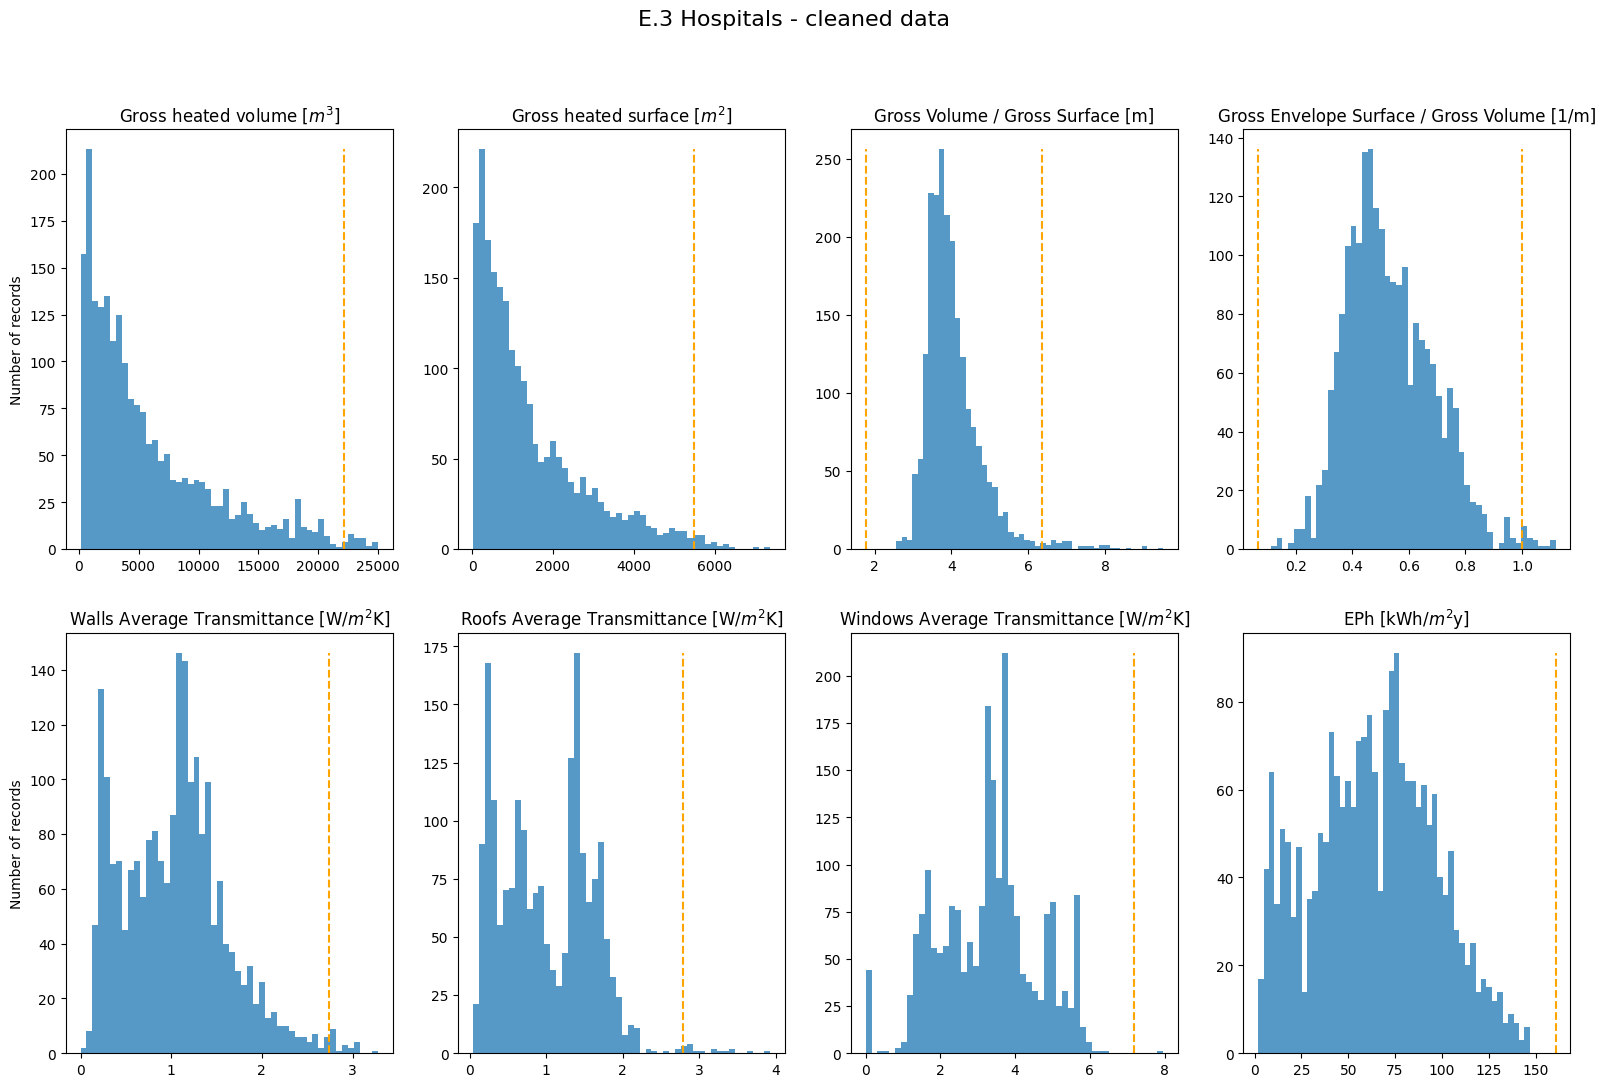

In [66]:
# plotting the cleaned data
figure_size = 12
fig, axs = plt.subplots(2, 4, figsize=(figure_size * 1.618, figure_size))
fig.suptitle('E.3 Hospitals - cleaned data', fontsize=16)

# gross volume
n, bins, patches = axs[0, 0].hist([df['VOLUME_LORDO']], 50, density=False, alpha=0.75)
v_mean = np.mean(df.VOLUME_LORDO)
v_stddev = np.std(df.VOLUME_LORDO)
line_x = np.array([v_mean + 3 * v_stddev, v_mean + 3 * v_stddev])
line_y = np.array([0, np.max(n)])
axs[0, 0].plot(line_x, line_y, ls = '--', c='orange')
if (v_mean - 3 * v_stddev) > 0:
  line_x = np.array([v_mean - 3 * v_stddev, v_mean - 3 * v_stddev])
  axs[0, 0].plot(line_x, line_y, ls = '--', c='orange')
axs[0, 0].set_title('Gross heated volume [$m^3$]')
axs[0, 0].set_ylabel('Number of records')

# gross surface
n, bins, patches = axs[0, 1].hist([df['SUPERFICIE_LORDA']], 50, density=False, alpha=0.75)
s_mean = np.mean(df.SUPERFICIE_LORDA)
s_stddev = np.std(df.SUPERFICIE_LORDA)
line_x = np.array([s_mean + 3 * s_stddev, s_mean + 3 * s_stddev])
line_y = np.array([0, np.max(n)])
axs[0, 1].plot(line_x, line_y, ls = '--', c='orange')
if (s_mean - 3 * s_stddev) > 0:
  line_x = np.array([s_mean - 3 * s_stddev, s_mean - 3 * s_stddev])
  axs[0, 1].plot(line_x, line_y, ls = '--', c='orange')
axs[0, 1].set_title('Gross heated surface [$m^2$]')

# average height
n, bins, patches = axs[0, 2].hist([df['H_MEDIA']], 50, density=False, alpha=0.75)
h_mean = np.mean(df.H_MEDIA)
h_stddev = np.std(df.H_MEDIA)
line_x = np.array([h_mean + 3 * h_stddev, h_mean + 3 * h_stddev])
line_y = np.array([0, np.max(n)])
axs[0, 2].plot(line_x, line_y, ls = '--', c='orange')
if (h_mean - 3 * h_stddev) > 0:
  line_x = np.array([h_mean - 3 * h_stddev, h_mean - 3 * h_stddev])
  axs[0, 2].plot(line_x, line_y, ls = '--', c='orange')
axs[0, 2].set_title('Gross Volume / Gross Surface [m]')

# S/V ratio
n, bins, patches = axs[0, 3].hist([df['RAPPORTO_SV']], 50, density=False, alpha=0.75)
sv_mean = np.mean(df.RAPPORTO_SV)
sv_stddev = np.std(df.RAPPORTO_SV)
line_x = np.array([sv_mean + 3 * sv_stddev, sv_mean + 3 * sv_stddev])
line_y = np.array([0, np.max(n)])
axs[0, 3].plot(line_x, line_y, ls = '--', c='orange')
if (sv_mean - 3 * sv_stddev) > 0:
  line_x = np.array([sv_mean - 3 * sv_stddev, sv_mean - 3 * sv_stddev])
  axs[0, 3].plot(line_x, line_y, ls = '--', c='orange')
axs[0, 3].set_title('Gross Envelope Surface / Gross Volume [1/m]')

# average walls transmittance
n, bins, patches = axs[1, 0].hist([df['TRASMITTANZA_MEDIA_INVOLUCRO']], 50, density=False, alpha=0.75)
yie_mean = np.mean(df.TRASMITTANZA_MEDIA_INVOLUCRO)
yie_stddev = np.std(df.TRASMITTANZA_MEDIA_INVOLUCRO)
line_x = np.array([yie_mean + 3 * yie_stddev, yie_mean + 3 * yie_stddev])
line_y = np.array([0, np.max(n)])
axs[1, 0].plot(line_x, line_y, ls = '--', c='orange')
if (yie_mean - 3 * yie_stddev) > 0:
  line_x = np.array([yie_mean - 3 * yie_stddev, yie_mean - 3 * yie_stddev])
  axs[1, 0].plot(line_x, line_y, ls = '--', c='orange')
axs[1, 0].set_title('Walls Average Transmittance [W/$m^2$K]')
axs[1, 0].set_ylabel('Number of records')

# average roofs transmittance
n, bins, patches = axs[1, 1].hist([df['TRASMITTANZA_MEDIA_COPERTURA']], 50, density=False, alpha=0.75)
yie_mean = np.mean(df.TRASMITTANZA_MEDIA_COPERTURA)
yie_stddev = np.std(df.TRASMITTANZA_MEDIA_COPERTURA)
line_x = np.array([yie_mean + 3 * yie_stddev, yie_mean + 3 * yie_stddev])
line_y = np.array([0, np.max(n)])
axs[1, 1].plot(line_x, line_y, ls = '--', c='orange')
if (yie_mean - 3 * yie_stddev) > 0:
  line_x = np.array([yie_mean - 3 * yie_stddev, yie_mean - 3 * yie_stddev])
  axs[1, 1].plot(line_x, line_y, ls = '--', c='orange')
axs[1, 1].set_title('Roofs Average Transmittance [W/$m^2$K]')

# average windows transmittance
n, bins, patches = axs[1, 2].hist([df['TRASMITTANZA_MEDIA_SERRAMENTO']], 50, density=False, alpha=0.75)
yie_mean = np.mean(df.TRASMITTANZA_MEDIA_SERRAMENTO)
yie_stddev = np.std(df.TRASMITTANZA_MEDIA_SERRAMENTO)
line_x = np.array([yie_mean + 3 * yie_stddev, yie_mean + 3 * yie_stddev])
line_y = np.array([0, np.max(n)])
axs[1, 2].plot(line_x, line_y, ls = '--', c='orange')
if (yie_mean - 3 * yie_stddev) > 0:
  line_x = np.array([yie_mean - 3 * yie_stddev, yie_mean - 3 * yie_stddev])
  axs[1, 2].plot(line_x, line_y, ls = '--', c='orange')
axs[1, 2].set_title('Windows Average Transmittance [W/$m^2$K]')

# Primary energy demand
n, bins, patches = axs[1, 3].hist([df['EPH']], 50, density=False, alpha=0.75)
ep_mean = np.mean(df.EPH)
ep_stddev = np.std(df.EPH)
line_x = np.array([ep_mean + 3 * ep_stddev, ep_mean + 3 * ep_stddev])
line_y = np.array([0, np.max(n)])
axs[1, 3].plot(line_x, line_y, ls = '--', c='orange')
if (ep_mean - 3 * ep_stddev) > 0:
  line_x = np.array([ep_mean - 3 * ep_stddev, ep_mean - 3 * ep_stddev])
  axs[1, 3].plot(line_x, line_y, ls = '--', c='orange')
axs[1, 3].set_title('EPh [kWh/$m^2$y]')

# fig.savefig('/content/drive/MyDrive/2023_EC3_SummerSchoolData/SchoolsDataQualityCleaned.pdf', dpi=300)
fig.show()

**Build the model**

In [67]:
# deleting columns I'm not going to use
df = df[['COMUNE','ANNO_COSTRUZIONE', 'VOLUME_LORDO', 'SUPERFICIE_DISPERDENTE', 'SUPERFICIE_VETRATA_OPACA', 'TRASMITTANZA_MEDIA_INVOLUCRO', 'TRASMITTANZA_MEDIA_COPERTURA', 'TRASMITTANZA_MEDIA_SERRAMENTO', 'EPH']]
df.head(20)

,COMUNE,ANNO_COSTRUZIONE,VOLUME_LORDO,SUPERFICIE_DISPERDENTE,SUPERFICIE_VETRATA_OPACA,TRASMITTANZA_MEDIA_INVOLUCRO,TRASMITTANZA_MEDIA_COPERTURA,TRASMITTANZA_MEDIA_SERRAMENTO,EPH
1,BIENNO,1978,4784.780,2821.010,0.1416,0.9970,1.0791,0.0000,105.4235
2,TREVIGLIO,2007,7308.770,3532.845,0.1389,0.4870,0.4410,3.3135,33.1249
3,ORIGGIO,1975,24375.000,8380.840,0.0644,1.1424,1.3500,3.8834,63.2907
5,CASTIGLIONE DELLE STIVIERE,1975,3379.000,2588.050,0.0620,1.1107,1.3500,4.9800,82.1046
7,PONTE LAMBRO,1993-2006,491.220,414.460,0.0425,1.1078,0.7400,3.2865,96.1053
8,CANEGRATE,2011,1865.000,988.898,0.0229,0.1906,0.1810,1.3628,23.9654
9,ALZANO LOMBARDO,prima del 1930,3830.100,2508.210,0.0969,1.8547,1.5830,3.1983,91.7326
12,VIMODRONE,1977-1992,2289.920,1725.250,0.0486,0.7751,0.9000,5.6600,90.7310
15,BOTTANUCO,1961-1976,6425.220,4272.860,0.0400,0.7879,0.6530,2.1828,42.0199
19,CUSANO MILANINO,1946-1960,2950.805,1501.030,0.0832,1.4324,0.6800,2.6336,79.7381


In [68]:
# Substituting the name of the town with the number of Degree Days
# loading DegreeDays, I'll swap these with the name of the town
gragio = pd.read_excel('/content/drive/MyDrive/2023_EC3_SummerSchoolData/GraGioWb2.xls')
# creating a map to replace the values
mappa = dict(zip(gragio.COMUNE, gragio.GRADI_GIORNO))
# replaceing the values
# sostituisco i gradi giorno
df['COMUNE']=df['COMUNE'].map(mappa)
df.head()

<ipython-input-68-451b8a1075ed>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['COMUNE']=df['COMUNE'].map(mappa)


,COMUNE,ANNO_COSTRUZIONE,VOLUME_LORDO,SUPERFICIE_DISPERDENTE,SUPERFICIE_VETRATA_OPACA,TRASMITTANZA_MEDIA_INVOLUCRO,TRASMITTANZA_MEDIA_COPERTURA,TRASMITTANZA_MEDIA_SERRAMENTO,EPH
1,2870,1978,4784.78,2821.010,0.1416,0.9970,1.0791,0.0000,105.4235
2,2237,2007,7308.77,3532.845,0.1389,0.4870,0.4410,3.3135,33.1249
3,2393,1975,24375.00,8380.840,0.0644,1.1424,1.3500,3.8834,63.2907
5,2363,1975,3379.00,2588.050,0.0620,1.1107,1.3500,4.9800,82.1046
7,2503,1993-2006,491.22,414.460,0.0425,1.1078,0.7400,3.2865,96.1053


In [71]:
# function to substitute the YoC with an integer
def process_value(value):
    if isinstance(value, float):
        return substitute_number(value)
    elif isinstance(value, str):
        if value.isdigit():
            return substitute_number(int(value))
        else:
            return substitute_string(value)
    else:
        return -1

def substitute_number(number_year):
    if number_year > 2006: return 7;
    elif number_year >=1993: return 6;
    elif number_year >=1977: return 5;
    elif number_year >=1961: return 4;
    elif number_year >=1946: return 3;
    elif number_year >=1930: return 2;
    elif number_year <1930: return 1;
    else: return -1

def substitute_string(string_year):
    if string_year == 'prima del 1930': return 1;
    elif string_year == '1930-1945': return 2;
    elif string_year == '1946-1960': return 3;
    elif string_year == '1961-1976': return 4;
    elif string_year == '1977-1992': return 5;
    elif string_year == '1993-2006': return 6;
    elif string_year == 'dopo il 2006': return 7;
    else: return -1


def check_and_substitute(df, column_name):
    df['ANNO_COSTRUZIONE'] = df[column_name].apply(process_value)
    return df


In [72]:
# substituting the YoC with an integer
check_and_substitute(df,'ANNO_COSTRUZIONE')
df.head()

,COMUNE,ANNO_COSTRUZIONE,VOLUME_LORDO,SUPERFICIE_DISPERDENTE,SUPERFICIE_VETRATA_OPACA,TRASMITTANZA_MEDIA_INVOLUCRO,TRASMITTANZA_MEDIA_COPERTURA,TRASMITTANZA_MEDIA_SERRAMENTO,EPH
1,2870,5,4784.78,2821.010,0.1416,0.9970,1.0791,0.0000,105.4235
2,2237,7,7308.77,3532.845,0.1389,0.4870,0.4410,3.3135,33.1249
3,2393,4,24375.00,8380.840,0.0644,1.1424,1.3500,3.8834,63.2907
5,2363,4,3379.00,2588.050,0.0620,1.1107,1.3500,4.9800,82.1046
7,2503,6,491.22,414.460,0.0425,1.1078,0.7400,3.2865,96.1053


In [73]:
# deleting records with NaN
vol_start = len(df)
print('Starting with',vol_start, 'records')
df.dropna(inplace=True)
vol_end = len(df)
print('Ending with',vol_end, 'records')
print('Deleted', vol_start-vol_end, 'records out of', vol_start, 'equal to',round((vol_end-vol_start)/vol_start*100,2),'%')

Starting with 2147 records
Ending with 1923 records
Deleted 224 records out of 2147 equal to -10.43 %


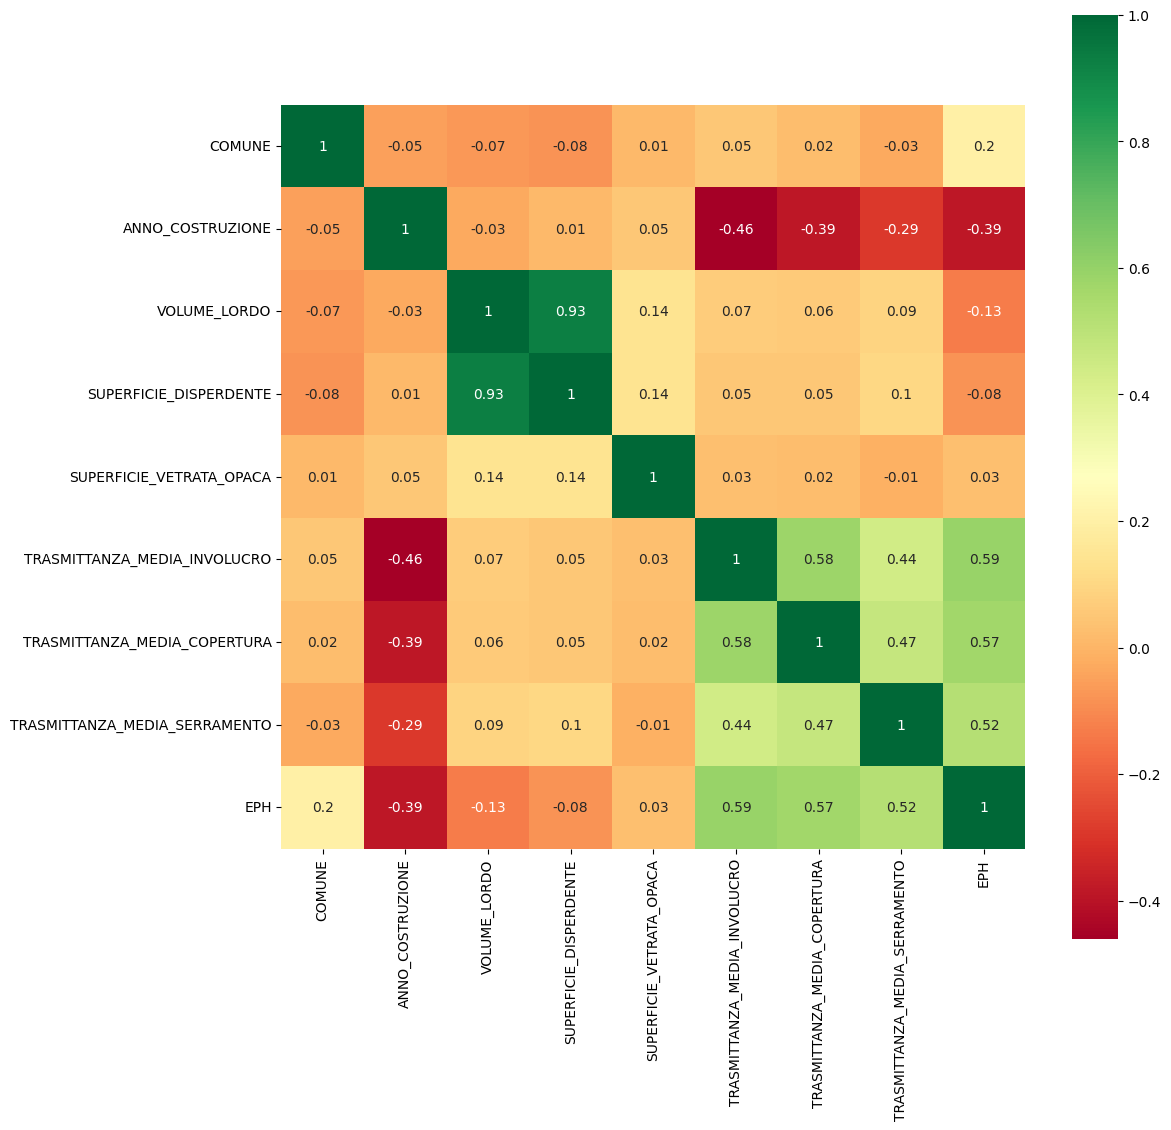

In [75]:
# plot of the correlation matrix
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr().round(2), square=True, cmap='RdYlGn', annot=True)
plt.show()

In [76]:
# define variable to train the model on
X = df[['COMUNE','ANNO_COSTRUZIONE', 'VOLUME_LORDO', 'SUPERFICIE_DISPERDENTE', 'SUPERFICIE_VETRATA_OPACA', 'TRASMITTANZA_MEDIA_INVOLUCRO', 'TRASMITTANZA_MEDIA_COPERTURA', 'TRASMITTANZA_MEDIA_SERRAMENTO']]
y = df['EPH'].copy()

In [78]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
explore_dataset = pd.concat([X_train, y_train], axis=1, sort=False)
train_dataset = explore_dataset.sample(frac=0.8, random_state=10)
train_feature = train_dataset.drop('EPH', axis=1)
train_label = train_dataset.pop('EPH')
valid_dataset = explore_dataset.drop(train_dataset.index)
valid_feature = valid_dataset.drop('EPH', axis=1)
valid_label = valid_dataset.pop('EPH')

In [79]:
# create a normalisation layer
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_feature))

In [81]:
# define a function to create the model
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(256, kernel_initializer='normal', activation='relu'),
      layers.Dense(256,  kernel_initializer='normal', activation='relu'),
      layers.Dense(128, kernel_initializer='normal', activation='relu'),
      layers.Dense(128,  kernel_initializer='normal', activation='relu'),
      layers.Dense(64,  kernel_initializer='normal', activation='relu'),
      layers.Dense(64,  kernel_initializer='normal', activation='relu'),
      layers.Dense(1,  kernel_initializer='normal')
  ])

  model.compile(loss='mse',
                metrics=[tf.keras.metrics.MeanAbsoluteError()],
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [82]:
# creating the model
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 8)                17        
 n)                                                              
                                                                 
 dense (Dense)               (None, 256)               2304      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                        

In [83]:
# training the model (this may take time)
%%time
history = dnn_model.fit(
    train_feature, train_label, batch_size = 16,
    validation_data=(valid_feature, valid_label),
    verbose=1, epochs=100,
    callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
77/77 [==============================] - 8s 11ms/step - loss: 2258.3096 - mean_absolute_error: 37.3309 - val_loss: 1897.4310 - val_mean_absolute_error: 22.9324
Epoch 2/100
77/77 [==============================] - 1s 8ms/step - loss: 692.1600 - mean_absolute_error: 20.7982 - val_loss: 1093.0597 - val_mean_absolute_error: 20.1693
Epoch 3/100
77/77 [==============================] - 1s 8ms/step - loss: 568.1006 - mean_absolute_error: 19.0636 - val_loss: 667.1250 - val_mean_absolute_error: 17.5948
Epoch 4/100
77/77 [==============================] - 1s 8ms/step - loss: 504.7772 - mean_absolute_error: 17.6791 - val_loss: 477.4590 - val_mean_absolute_error: 15.8585
Epoch 5/100
77/77 [==============================] - 1s 7ms/step - loss: 461.5406 - mean_absolute_error: 16.9089 - val_loss: 499.8315 - val_mean_absolute_error: 16.3632
Epoch 6/100
77/77 [==============================] - 0s 5ms/step - loss: 440.8842 - mean_absolute_error: 16.3110 - val_loss: 388.5438 - val_mean_absolu

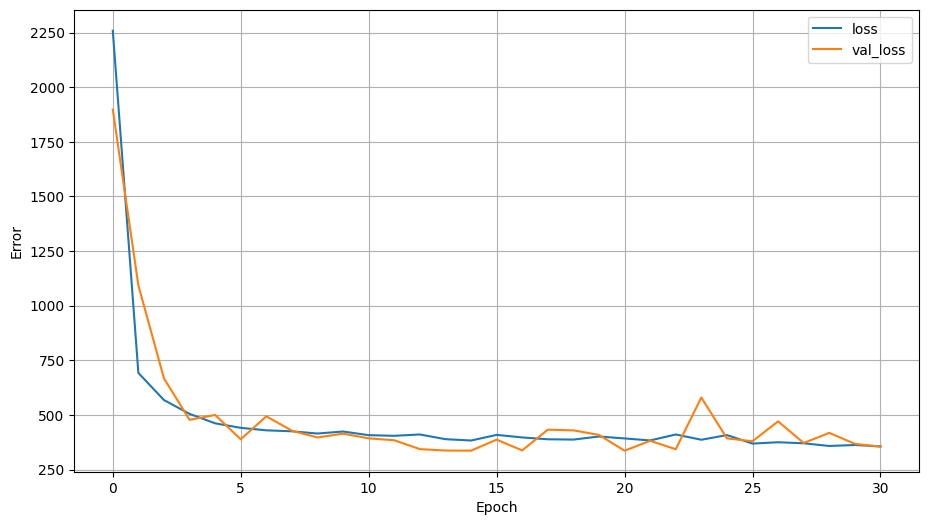

In [84]:
# Drawin the loss
fig_dpi = 100
fig_size = 6
ra = 1.816
fig = plt.figure(dpi=fig_dpi, figsize=(fig_size * ra, fig_size))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

In [85]:
# verifing model performance on the test dataset
test_dataset = pd.concat([X_test, y_test], axis=1)
test_feature = test_dataset.copy()
test_labels = test_feature.pop('EPH')
test_results = {}
test_results['dnn_model'] = dnn_model.evaluate(test_feature, test_labels, verbose=1)

13/13 [==============================] - 0s 3ms/step - loss: 466.8805 - mean_absolute_error: 16.2490


13/13 [==============================] - 0s 3ms/step


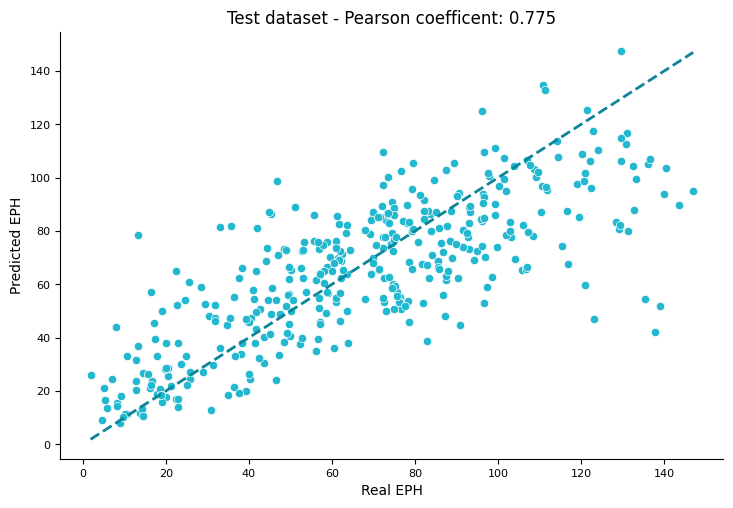

In [108]:
# plotting ANN performances on the test dataset
test_predictions = dnn_model.predict(X_test).flatten()
g = sns.relplot(x=test_labels, y=test_predictions, kind='scatter', color='#22B8CF')
g.fig.set_size_inches(8,5)
g.ax.plot([test_labels.min(), test_labels.max()], [test_labels.min(), test_labels.max()], lw=2, linestyle='dashed', color='#0C8599')
g.ax.tick_params(labelsize=8)
g.ax.set_xlabel('Real EPH',fontsize=10)
g.ax.set_ylabel('Predicted EPH',fontsize=10)
plt.ticklabel_format(style='plain')
plt.title('Test dataset - Pearson coefficent: '+str(round(np.min(np.corrcoef(test_labels.to_numpy(), test_predictions)),3)))
plt.show()

61/61 [==============================] - 0s 3ms/step


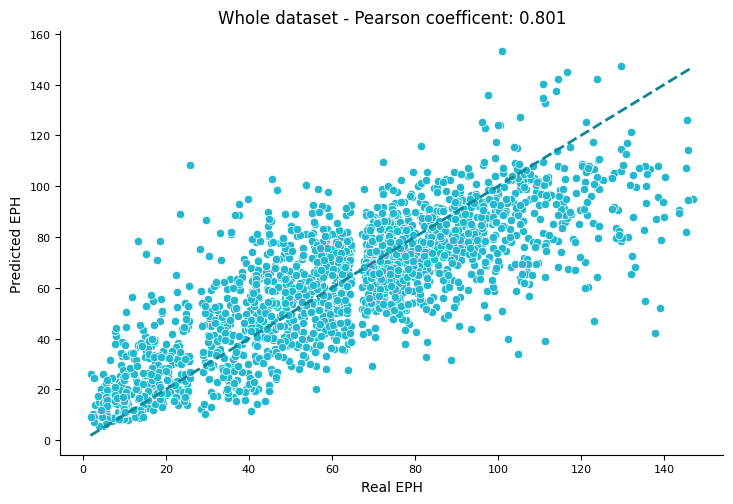

In [109]:
# plotting ANN performances on the whole dataset
test_dataset = df
features = df.copy()
labels = features.pop('EPH')
predictions = dnn_model.predict(X).flatten()

g = sns.relplot(x=labels, y=predictions, kind='scatter', color='#22B8CF')
g.fig.set_size_inches(8,5)
g.ax.plot([labels.min(), labels.max()], [labels.min(), labels.max()], lw=2, linestyle='dashed', color='#0C8599')
g.ax.tick_params(labelsize=8)
g.ax.set_xlabel('Real EPH',fontsize=10)
g.ax.set_ylabel('Predicted EPH',fontsize=10)
plt.ticklabel_format(style='plain')
plt.title('Whole dataset - Pearson coefficent: '+str(round(np.min(np.corrcoef(labels.to_numpy(), predictions)),3)))
plt.show()